<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/KnnROCanalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6e404f4f5e4a178b4c2ab038459038a3875c420e800a66873d7725cad91a822b
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris.data.shape)

(150, 4)


In [5]:
X, y = load_iris(return_X_y=True)

Dividir el dataset en entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)


In [7]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [8]:

scores = {}
scores_list = []
for k in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  scores[k] = accuracy_score(y_test, y_predict)
  scores_list.append(accuracy_score(y_test, y_predict))

In [9]:
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



In [10]:
m_c = confusion_matrix(y_test, y_predict)
m_c

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

In [11]:
negative_true = m_c[0][0]
print("Verdaderos negativos")
print(negative_true)

Verdaderos negativos
16


In [12]:
negative_false = m_c[1][0]
print("Falsos negativos")
print(negative_false)

Falsos negativos
0


In [13]:
positive_true= m_c[1][1]
print("Verdaderos positivos")
print(positive_true)

Verdaderos positivos
4


In [14]:
positive_false= m_c[0][1]
print("Falsos positivos")
print(positive_false)

Falsos positivos
0


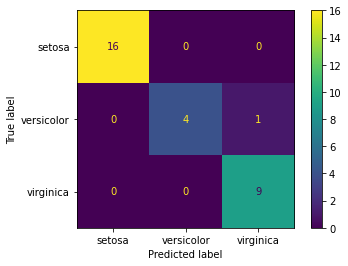

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=m_c,display_labels=target_names)
disp.plot()
plt.show()

In [16]:
y = iris.target
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
print(n_classes)

knn = KNeighborsClassifier(50)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
score = knn.predict_proba(X_test)
y_test = np.array(y_test)
y_test

#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#for h in range(n_classes):
#  for i in range(3):
#    for j in range(30):
#      print(score[j][i])


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test, score[:,i], pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predict.ravel(), pos_label=1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


3


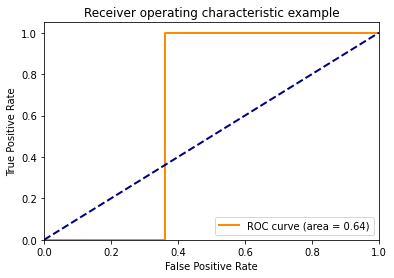

In [17]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()